<img src="HMM1-Copy1.png" caption="HMM of crazy soda machine">

Emmission Matrix

|                    | cola | iced tea | lemonade
| -:                 | :-:  | :-:      | :-:
| **Cola Pref.**     | 0.6  | 0.1      | 0.3
| **Iced Tea Pref.** | 0.1  | 0.7      | 0.2

State Matrix:

|                    | Cola Pref. | Iced Tea Pref.
| -:                 | :-:        | :-:
| **Cola Pref.**     | 0.7        | 0.3
| **Iced Tea Pref.** | 0.5        | 0.5

Known Initial State:

| State            | Prob.
| -:               | :-:
| *Cola Pref.*     | 1.0
| *Iced Tea Pref.* | 0.0

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt

In [3]:
stateMatrix = np.matrix("0.7 0.3; 0.5 0.5")
emissionMatrix = np.matrix("0.6 0.1 0.3; 0.1 0.7 0.2")
initialMatrix = np.matrix("1 0")

In [29]:
random.seed(1)
current_state = initialMatrix

predicted = []

for t in range(0, 10000):
    past_state = current_state
    random_num = random.random()
    
    if past_state[0,0] == 1:
        if random_num >= 0.3:
            current_state = past_state
        else:
            current_state = np.matrix("0 1")
            
    elif past_state[0,1] == 1:
        if random_num >= 0.5:
            current_state = past_state
        else:
            current_state = np.matrix("1 0")
    
    random_num = random.random()
    
    if current_state[0,0] == 1:
        if random_num < 0.6:
            
            predicted.append(np.random.normal(3, 2, size=(1))[0])
        elif random_num >= 0.6 and random_num < 0.7:
            predicted.append(np.random.normal(-5, 1, size=(1))[0])
        elif random_num >= 0.7:
            predicted.append(np.random.normal(9, 3, size=(1))[0])
            
    elif current_state[0,1] == 1:
        if random_num < 0.1:
            predicted.append(np.random.normal(3, 2, size=(1))[0])
        elif random_num >= 0.1 and random_num < 0.8:
            predicted.append(np.random.normal(-5, 1, size=(1))[0])
        elif random_num >= 0.8:
            predicted.append(np.random.normal(9, 3, size=(1))[0])
    

Emission 1 is dist: normal(3, 2.5)

Emission 1 is dist: normal(1,1)
Emission 1 is dist: normal(6, 4)

(array([  5.,   7.,  33.,  64., 152., 227., 311., 432., 428., 415., 359.,
        240., 181.,  84.,  42.,  11.,   6.,   2.,   0.,   1.]),
 array([-0.9081961 ,  0.22660328,  1.36140266,  2.49620204,  3.63100142,
         4.7658008 ,  5.90060018,  7.03539956,  8.17019895,  9.30499833,
        10.43979771, 11.57459709, 12.70939647, 13.84419585, 14.97899523,
        16.11379461, 17.24859399, 18.38339337, 19.51819275, 20.65299214,
        21.78779152]),
 <BarContainer object of 20 artists>)

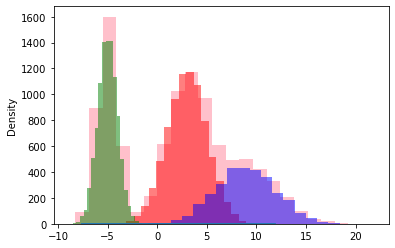

In [54]:
plt.hist(predicted, bins = 20, color = 'pink')



plt.hist(np.random.normal(3, 2, size=(8000)),bins = 20, color = "r", alpha = 0.5)
plt.hist(np.random.normal(-5, 1, size=(10000)),bins = 20, color = "g", alpha = 0.5)
plt.hist(np.random.normal(9, 3, size=(3000)),bins = 20, color = "b", alpha = 0.5)

<AxesSubplot:ylabel='Density'>

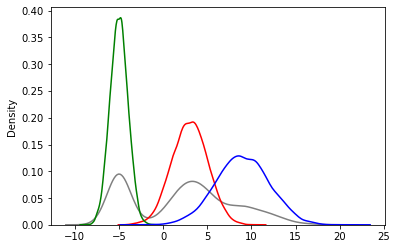

In [86]:
sns.kdeplot(predicted,color = 'grey',alpha=0.1)


sns.kdeplot(np.random.normal(3, 2, size=(10000)), color = "r", alpha = 0.6)
sns.kdeplot(np.random.normal(-5, 1, size=(10000)),color = 'g', alpha = 0.6)
sns.kdeplot(np.random.normal(9, 3, size=(10000)),color = 'b', alpha = 0.6)

## Same but with added noise (normal(0,0.5))

In [87]:
random.seed(1)
current_state = initialMatrix

predicted = []

for t in range(0, 10000):
    past_state = current_state
    random_num = random.random()
    
    if past_state[0,0] == 1:
        if random_num >= 0.3:
            current_state = past_state
        else:
            current_state = np.matrix("0 1")
            
    elif past_state[0,1] == 1:
        if random_num >= 0.5:
            current_state = past_state
        else:
            current_state = np.matrix("1 0")
    
    random_num = random.random()
    
    if current_state[0,0] == 1:
        if random_num < 0.6:
            
            predicted.append(np.random.normal(3, 2, size=(1))[0] + np.random.normal(0, 0.5, size=(1))[0])
        elif random_num >= 0.6 and random_num < 0.7:
            predicted.append(np.random.normal(-5, 1, size=(1))[0]+ np.random.normal(0, 0.5, size=(1))[0])
        elif random_num >= 0.7:
            predicted.append(np.random.normal(9, 3, size=(1))[0]+ np.random.normal(0, 0.5, size=(1))[0])
            
    elif current_state[0,1] == 1:
        if random_num < 0.1:
            predicted.append(np.random.normal(3, 2, size=(1))[0]+ np.random.normal(0, 0.5, size=(1))[0])
        elif random_num >= 0.1 and random_num < 0.8:
            predicted.append(np.random.normal(-5, 1, size=(1))[0]+ np.random.normal(0, 0.5, size=(1))[0])
        elif random_num >= 0.8:
            predicted.append(np.random.normal(9, 3, size=(1))[0]+ np.random.normal(0, 0.5, size=(1))[0])
    

(array([  10.,  280., 1316., 1333.,  297.,  148.,  488., 1026., 1229.,
        1028.,  717.,  560.,  519.,  470.,  279.,  183.,   82.,   25.,
           7.,    3.]),
 array([-9.43538175, -7.95853864, -6.48169552, -5.0048524 , -3.52800929,
        -2.05116617, -0.57432306,  0.90252006,  2.37936318,  3.85620629,
         5.33304941,  6.80989253,  8.28673564,  9.76357876, 11.24042188,
        12.71726499, 14.19410811, 15.67095122, 17.14779434, 18.62463746,
        20.10148057]),
 <BarContainer object of 20 artists>)

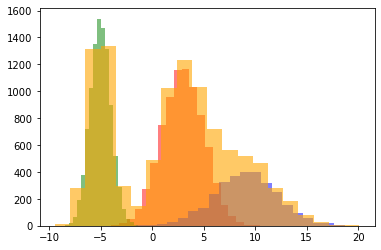

In [96]:

plt.hist(np.random.normal(3, 2, size=(8000)),bins = 20, color = "r", alpha = 0.5)
plt.hist(np.random.normal(-5, 1, size=(10000)),bins = 20, color = "g", alpha = 0.5)
plt.hist(np.random.normal(9, 3, size=(3000)),bins = 20, color = "b", alpha = 0.5)
plt.hist(predicted, bins = 20, color = 'orange',alpha= 0.6)


##  
## Questions:

This is for discrete outputs, how would I change this for continuous?

Do we want it in discrete/ continuous?

This is completely hardcoded, how to I make it generalizable for an inputted HMM?

